# Notes on Python
## Examples for reference, tips, Best Practices

Based on the Course: Core Python (Functions and Functional Programming | Classes and Object-Orientation) at PluralSight

Author: Gonçalo Felício  
Date: 04/2022  
Provided by: ISIWAY

Something like a pocketbook to come to for quick references, examples, and tips of best practices, compiled with my own preferences  
Loosely divided by subject, and with some degree, by the respective modules


#### Free Functions  
Functions defined at module or global scope

#### Methods
Functions defined within a Class definition

Positional arguments are the arguments matched by position, must be written in order  
Keyword arguments are arguments matched by name

The `__call__()` method allows us to make any object callable, like functions  
When calling an object with this method defined, a callable **instance** object is created

To determine if an object is callable we can use the `callable()` method

### Lambdas
Lambdas are unnamed callable objects  
Can be well used in comprehensions and with iterables, when a simple expression is required to filter the iterable, but defining a new function for it is not really necessary  
Lambdas are expressions that evaluate to a function object

In [8]:
scientists = ['ab cd', 'de bc', 'cd ef', 'de fg']

Sorts the scientists list by the last name of the scientist. The key argument is defined with a lambda function

In [9]:
sorted(scientists, key=lambda name: name.split()[-1])

['de bc', 'ab cd', 'cd ef', 'de fg']

### Extended Arguments and Call Syntax
An extended argument syntax allows us to call an arbitrary number of positional and keyword arguments with the `*` key  

In [10]:
def hypervolume(*args):
    print(args)
    print(type(args))

In [11]:
hypervolume(3,4)

(3, 4)
<class 'tuple'>


In [12]:
hypervolume(3,4,5)

(3, 4, 5)
<class 'tuple'>


`*args` must come after normal positional arguments  
After `*args`, only keyword arguments are accepted  
To collect arbitrary keyword arguments, we use `**kwargs`  
Like with positional arguments, `**kwargs` must come last  

We can also specify only positional or keyword arguments.  

By using the `/` as an argument. Arguments before the slash are positional only arguments.

#### Extended Call Syntax

This is when we call an object with the `*` in the call
The function with this syntax unpacks the tuple or dict, for `*args` and `**kwargs` respectively, and assigns them to the arguments inside the function  
In this case the dict is unpacked, the first two items are considered as positional args, and the following items are considered keyword args

In [2]:
def color(red, green, **kwargs):
    print(red)
    print(green)
    print(kwargs)

In [3]:
k = {'red':21, 'green':68, 'alpha':50, 'blue': 96}
color(**k)

21
68
{'alpha': 50, 'blue': 96}


#### Argument Forwarding
Argument forwarding is when a funtion transfers arguments to another function  
With extended arguments and call syntax we can do this for any number of arguments

Careful that args and kwargs are a tuple and a dictionary with the values of the arguments in the call  
Therefore, when calling f function, must use the **extended call syntax** to accept the tuple and dict correctly

In [23]:
def trace(f, *args, **kwargs):
    print(args)
    print(kwargs)
    
    result = f(*args, **kwargs)
    print(result)
    
    return result

In [24]:
trace(int, 'ff', base=16)

('ff',)
{'base': 16}
255


255

### Closures

#### Local Funtions
Functions that are defined inside other functions. These functions need the enclosing scope  
Reminder:  
Python names are looked up using the LEGB rule: Local, Enclosing, Global, Built-in  
We can access global references and reassign them in the local scope with the `global` keyword  

Local functions can be returned from a function, like any other object, this way we can implement factory functions  
However, care must be taken so that the local and enclosing variables are well handled.
The `nonlocal` lets us bind names from the enclosing scope, in the local scope. This way a local function can maintain it's state between invocations

In [35]:
message = 'at the global scope'


def enclosing():
    message = 'at the enclosing scope'
    
    def local():
        message = 'at the local scope'
        print(message)
    
    print(message)
    local()
    print(message)

With this example, we can see that `local` function does not change the message variable at the enclosing scope, only at the local scope

In [37]:
enclosing()

at the enclosing scope
at the local scope
at the enclosing scope


In [38]:
print(message)

at the global scope


We can use the `global` keyword and the `nonlocal` keyword to affect variables from other scopes

In [55]:
message = 'at the global scope'


def enclosing():
    message = 'at the enclosing scope'
    
    def local():
        nonlocal message
        message = 'at the local scope'
        print(message)

    
    print(message)
    local()
    print(message)

In [56]:
enclosing()
# local() changed the enclosing variable message

at the enclosing scope
at the local scope
at the local scope


In [57]:
print(message)
# local() didnt change the global variable message

at the global scope


Cool function to measure elapsed time between invocations of the function

In [66]:
import time

def make_timer():
    last_called = None
    
    def elapsed():
        nonlocal last_called
        now = time.time()
        #print(last_called)
        #print(now)
        
        if last_called is None:
            last_called = now
            return
        
        result = now - last_called
        last_called = now
        #print(last_called)
        
        return result

    return elapsed


In [67]:
t = make_timer()

In [68]:
t

<function __main__.make_timer.<locals>.elapsed()>

In [69]:
t()

In [70]:
t()

1.2630095481872559

In [71]:
t()

1.4248881340026855

In [72]:
t()

2.352085590362549

In [73]:
t()

5.145913362503052

### Decorators

Decorators modify existing callables without changing the actual callable implementation  
We apply a decorator with the `@` just before defining the callable  
In a way, we can define decorators as callables that accept a callable, and return the callable modified  
Therefore we can apply them to functions, classes and instances  
More than one decorator can also be applied to a callable and it just works recursively, since decorators take and return the same object type, callables

In [78]:
def hello():
    """Prints a 'hello world'"""
    print('hello world')

In [77]:
hello()

hello world


In [76]:
help(hello)

Help on function hello in module __main__:

hello()
    Prints a 'hello world'



This decorator makes no modification

In [75]:
def decorator_noop(f):
    def noop_wrapper():
        return f()
    return noop_wrapper

In [79]:
@decorator_noop
def hello():
    """Prints a 'hello world'"""
    print('hello world')

In [80]:
hello()

hello world


In [81]:
help(hello)

Help on function noop_wrapper in module __main__:

noop_wrapper()



The docstring of the original function is no longer accessible.  
This can be fixed with `functools.wrap()`  

In [82]:
import functools
def decorator_noop(f):
    @functools.wraps(f)
    def noop_wrapper():
        return f()
    return noop_wrapper

In [83]:
@decorator_noop
def hello():
    """Prints a 'hello world'"""
    print('hello world')

In [84]:
hello()

hello world


In [85]:
help(hello)

Help on function hello in module __main__:

hello()
    Prints a 'hello world'



#### Parameterized decorators
These are decorators that are not actually decorators, as they take in arguments, not functions, but can be used as decorators if they are called 

In [87]:
def check_non_neg(index):
    def validator(f):
        def wrap(*args):
            if args[index] < 0:
                raise ValueError('Argument {} must be non negative.'.format(index))
            return f(*args)
        return wrap
    return validator

In [89]:
@check_non_neg(1)
def create_list(value, size):
    return [value] * size

In [90]:
create_list('a', 3)

['a', 'a', 'a']

In [91]:
create_list('b', -1)

ValueError: Argument 1 must be non negative.

This 'decorator' works because validator, which is returned by `check_non_neg` is a callable and so `check_non_neg(1)` is a callable and returns a callable, satisfying the decorator conditions.  

The function `check_non_neg(1)` takes in the index that must be checked and, if the value of the index is positive, returns the function create_list with no changes, if it's negative, raises an helpful error message.

### Map
A built-in function that applies a callable to the elements in a sequence. Returns a `map` object with the return values of the callable on each element.  
It has a lazy evaluation, just like generators.

Trace Class to trace calls of the map function, to show the lazy evaluation in effect  
Usually we call `list()` on the `map` to evaluate the full sequence at once  
Also, `map` can take multiple sequences as input and will iterate over the elements of each sequence in order. This is a great tool to transpose matrices  
It will continue to iterate over the sequences until any single iterable is exhausted, we can even use infinite sequences, just like with generators  
The results of `map` are identical to a comprehension  

In [1]:
class Trace:
    def __init__(self):
        self.enabled = True
    def __call__(self, f):
        def wrap(*args, **kwargs):
            if self.enabled:
                print(f'Calling {f}')
            return f(*args, **kwargs)
        return wrap

In [2]:
result = map(Trace()(ord), 'The brown fox')

In [3]:
result

In [4]:
next(result)

Calling <built-in function ord>


84

In [5]:
next(result)

Calling <built-in function ord>


104

In [6]:
next(result)

Calling <built-in function ord>


101

In [12]:
list(map(ord, 'the brown fox'))

[116, 104, 101, 32, 98, 114, 111, 119, 110, 32, 102, 111, 120]

### Filter
Has many similarities with `map`, however can only take one function and one sequence that is the argument to the filter function  
Similar to using the `lambda` comprehensions to filter a sequence  
In the end returns the elements in the sequence that return `True` on the filter function  
We can also use the `None` keyword as the function argument, and the elements that return `False` as booleans are removed

In [15]:
trues = filter(None, [0, 1, [], [1,2,3,], '', 'a trueish string', True])
trues

In [16]:
list(trues)

[1, [1, 2, 3], 'a trueish string', True]

### Reduce
Applies a 2 argument function that takes the `acummulated` arguments and the next element in the sequence  
The final value of the `accumulated` value is returned, reducing a sequence to a single value  
In a way, is a general case of the `sum` function  
In other words it's the equivalent of an aggregator function  
Can also, optionally, define the initial value

In [31]:
from functools import reduce
import operator

reduce(operator.add, [1,2,3,4,])

10

In [32]:
sum([1,2,3,4])

10

### Multi input and Nested Comprehensions
Comprehensions can take in an arbitrary number of inputs and if conditions  
They work just like nested for-loops, evaluating the inner loop, for each element of the outer loop  

In [34]:
[(x,y,z) for x in range(5) for y in range(5) for z in range (5)]

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

Looking at the output we can see that the order of the loops starts from the end and evaluates backwards  
Care must be taken when using multiple inputs and multiple if clauses, as the clarity and readability of the code can get out of hand  
Implementing for-loops at this point is the recommended action 

#### Nested Comprehensions
Nested comprehensions are different in the sense that they return a list of lists, but the logic is the same

In [36]:
vals = [[y*3 for y in range(x)] for x in range(5)]
vals

[[], [0], [0, 3], [0, 3, 6], [0, 3, 6, 9]]

## Classes

**Class atributes** are variables assigned within the body of the class and are not associated with instances of the class  

**Instance attributes** are prefixed with the `self.` keyword and are associated to each instance, meaning they can vary between instances. Often are defined in the `__init__` method of the class  
This means that class attributes are shared between instances, but instance attributes are not  

Navigate to class attributes by **fully qualifying them with the class name**, even inside the class. This is because the class attributes are not defined in a scope, as classes do not instatiate scope enclosures  

Assigning to class attributes through the self always creates new instance attributes, not class attributes, this can lead to hiding the class attributes with instance attributes of the same name. For this reason it's allways better to use the class name prefix when handling class attributes  

In [5]:
class MyClass:
    b = 'class attr'

    def __init__(self):
        self.a = 'instance attr'
        print(self.a)
        print(MyClass.b)
        print(self.b) # the class attribute b can be acessed via self. but cannot be assigned with self.
        print(MyClass.a)


In [6]:
instance1 = MyClass()

instance attr
class attr
class attr


AttributeError: type object 'MyClass' has no attribute 'a'

In [7]:
instance1.a

'instance attr'

In [8]:
instance1.b

'class attr'

The decorator `@staticmethod` can be used to create methods inside the class that are independent of the class and of the instance of the class  
Requires the `self` argument, but does not actually use it. These methods are usually implementation details of the class. Can also be substituted by Global functions
The decorator `@classmethod` can be used for methods which need the class but not the instance  
The `@classmethod` decorator requires the `cls` argument and this is the name of the class being referenced, which is then used in the implementation of the method  

In [21]:
class ShippingContainer_old:
    
    next_serial = 1337
    
    @classmethod
    def _generate_serial(cls):
        result = cls.next_serial
        cls.next_serial += 1
        return result
    
    
    def __init__(self, owner_code, contents):
        self.owner_code = owner_code
        self.contents = contents
        self.serial = ShippingContainer._generate_serial()
        
    
    @classmethod
    def create_empty(cls, owner_code):
        return cls(owner_code, contents=[])

In [12]:
c1 = ShippingContainer_old('MAE','tools')
c1.serial

1337

In [13]:
c2 = ShippingContainer_old('MAE','tools2')
c2.serial

1338

In [14]:
c2.next_serial

1339

#### Named-contructors
Named constructors are factory methods that return an instance of a class  
Give more flexibility to create instances  
An example of a named constructor that creates instances of empty shipping containers from the ShippingContainer class

In [17]:
@classmethod
def create_empty(cls):
    return cls(owner_code, contents=[])

In [22]:
c3 = ShippingContainer_old.create_empty('MAE')
c3

Static and class-methods can be overriden via inheritance.  
Static and class-methods are polymorphic when invoked through an instance instead of through a class  
This is, when we need a method to change behaviour based on the instance being called, we use the `self.` to propagate the differences between instances to the method, and not the class name, as it is independent of the instance and would return the default value, rather than the desired, alternate behaviour.

The `@property` decorator can be used to wrap attributes from getter and setter methods
We can easily override properties by delegating to regular methods 

The demo class below contains examples of all these characteristics

`ShippingContainer` is a class with static and classic methods  
These methods accept and forward `**kwargs` to allow inheritance for the derived classes  
`RefrigeratedShippingContainer` is a derived class that inherits from `ShippingContainer`. The main difference is in the keyword argument celsius (the * before the celsius argument makes it a keyword argument). The derived class also uses the `super().__init__` to allow for inheritance forwarding  
The base class should have no knowledge of derived classes, this is why we should use the `**kwargs` to thread variables between them  

In [1]:
import iso6346

In [6]:
iso6346.__doc__()

'\nISO 6346 shipping container codes.\n'

In [12]:
r3 = RefrigeratedShippingContainer.create_with_items('ESC', 10, ['fish', 'onions'], celsius=2)

In [13]:
r3

In [14]:
r3.contents

['fish', 'onions']

In [15]:
r3.bic

'ESCR0013370'

In [16]:
r3.celsius

2

The `celsius` method is a getter method that returns the value of `celsius`. This means the method behaves like an attribute of the class  
This also makes it a read only attribute, we cannot set it from the repl without the `setter` method  
The decorator `setter` does the assigning and can even check conditions such as temperature threshold  
The farhneit property uses static methods to convert from celsius to f and also makes use of the same celsius setter to guaranteee temperature thresholds. The property itself does not need to check the temperature.  

This is in line with DRY type programming, Dont Repeat Yourself  

The property decorator is very powerful to maintain class invariants, but it can lead to over-coupling of the methods in the class if overused.

It's allways better to design code where the client **Tells** the program what to do, **not ask** the program its state and then do the actions themselves



In [17]:
r3.celsius = 6

ValueError: Temperature too hot!

In [8]:
class ShippingContainer:

    HEIGHT_FT = 8.5
    WIDTH_FT = 8.0

    next_serial = 1337

    @classmethod
    def _generate_serial(cls):
        result = cls.next_serial
        cls.next_serial += 1
        return result

    @staticmethod
    def _make_bic_code(owner_code, serial):
        return iso6346.create(
            owner_code=owner_code,
            serial=str(serial).zfill(6)
        )

    @classmethod
    def create_empty(cls, owner_code, length_ft, **kwargs):
        return cls(owner_code, length_ft, contents=[], **kwargs)

    @classmethod
    def create_with_items(cls, owner_code, length_ft, items, **kwargs):
        return cls(owner_code, length_ft, contents=list(items), **kwargs)

    def __init__(self, owner_code, length_ft, contents, **kwargs):
        self.owner_code = owner_code
        self.length_ft = length_ft
        self.contents = contents
        self.bic = self._make_bic_code(
            owner_code=owner_code,
            serial=ShippingContainer._generate_serial()
        )

    @property
    def volume_ft3(self):
        return self._calc_volume()

    def _calc_volume(self):
        return ShippingContainer.HEIGHT_FT * ShippingContainer.WIDTH_FT * self.length_ft


class RefrigeratedShippingContainer(ShippingContainer):

    MAX_CELSIUS = 4.0
    FRIDGE_VOLUME_FT3 = 100

    def __init__(self, owner_code, length_ft, contents, *, celsius, **kwargs):
        super().__init__(owner_code, length_ft, contents, **kwargs)
        self.celsius = celsius

    @staticmethod
    def _c_to_f(celsius):
        return celsius * 9/5 + 32

    @staticmethod
    def _f_to_c(fahrenheit):
        return (fahrenheit - 32) * 5/9

    @property
    def celsius(self):
        return self._celsius

    @celsius.setter
    def celsius(self, value):
        self._set_celsius(value)

    def _set_celsius(self, value):
        if value > RefrigeratedShippingContainer.MAX_CELSIUS:
            raise ValueError("Temperature too hot!")
        self._celsius = value

    @property
    def fahrenheit(self):
        return RefrigeratedShippingContainer._c_to_f(self.celsius)

    @fahrenheit.setter
    def fahrenheit(self, value):
        self.celsius = RefrigeratedShippingContainer._f_to_c(value)

    def _calc_volume(self):
        return (
            super()._calc_volume()
            - RefrigeratedShippingContainer.FRIDGE_VOLUME_FT3
        )

    @staticmethod
    def _make_bic_code(owner_code, serial):
        return iso6346.create(
            owner_code=owner_code,
            serial=str(serial).zfill(6),
            category="R"
        )


class HeatedRefrigeratedShippingContainer(RefrigeratedShippingContainer):

    MIN_CELSIUS = -20

    def _set_celsius(self, value):
        if value < HeatedRefrigeratedShippingContainer.MIN_CELSIUS:
            raise ValueError("Temperature too cold!")
        super()._set_celsius(value)


The HeatedRefrigeratedShippingContainer class is an example of overriding properties of the base class with derived classes  
This is done by turning the getter and setter mehtod to template regular methods that are then overriden in the derived classes, like the `_set_celsius` and `_calc_volume`


In [21]:
h1 = HeatedRefrigeratedShippingContainer('ESC', 40, ['dogs'], celsius = -18)
h1.celsius

-18

In [22]:
h1.celsius = -23

ValueError: Temperature too cold!

In [23]:
h1.celsius = 40

ValueError: Temperature too hot!

### String Representation
3 built in functions can be used to produce string representations of objects:

#### repre() 
is used for developers and gives the response of the REPL
#### str()
gives the default of string conversion and print, used for end-users
#### format()
is also used for users, but gives more flexibitlity and control of the details printed

All these functions delegate to the special dunder methods of the same name

Usaully __repr__() is not very useful and should be overriden iside the class to display more useful info to developers

In [25]:
#Template of __repre__() implementation
def __repr__(self):
    return f'{typename(self)}(argument 1 = {self.arg1_name}, argument 2 = {self.arg2_name} )'

Can also see the repr result and the variable name using `=` in the f string

In [28]:
variable_name = 'the repr result'
f'{variable_name=}'

"variable_name='the repr result'"

### Multiple Inheritance
Because Python is a **duck typing** language, there is no need to satisfy a static type system through the use of inheritance between objects.

It's best to use inheritance to share implementation!

To declare multiple classes to inherit, use a comma separated sequence of class names  
A class can have an arbitrary number of base classes  
Generally its better to initialize base classes by calling the `__init__` from the subclasses initializer  
If no base class is initialized, when multiple base classes are present, the first base class is initialized  
If a class with no init and a single base class, the base class init is automatically called on contruction

In [40]:
class Base:
    def __init__(self):
        print('Base class init')
    
    def f(self):
        print('Base.f()')
        
class SubClass(Base):
    def __init__(self):
        super().__init__()
        print('Subclass init')
    
    def f(self):
        print('Subclass f()')
        super().f()

In [41]:
s = SubClass()

Base class init
Subclass init


In [42]:
# overrides base class f, BUT can still call base class f() with super()
s.f()

Subclass f()
Base.f()


Type checking can be done by using `isinstance` and `issubclass` to make use of inheritances

In [43]:
isinstance(6, int)

True

In [44]:
issubclass(SubClass, Base)

True

`__bases__` is a tuple with the base classes of a class, in the same order as the class definition  

MRO, or method resolution order defines the order in which Python searches an inheritance graph  
`__mro__` returns a tuple of types and Python chooses the first entry which has a method of the name called  

`super()` uses the elements in MRO after some specified type
It returns a proxy object which forwards calls to the correct object
A super proxy takes the MRO of its second argument for name resolution  
Because `super` works on MRO and not just a classes's base classes it can be used to cooperate between classes without any knowledge of one another

`object` is the ultimate base object of all other classes, this is also the default base class of any class without base classes

Animal is th base class, bird is a subclass that uses `super()` to override description of Animal  


In [45]:
class Animal:
    @classmethod
    def description(cls):
        return "An animal"


class Bird(Animal):
    @classmethod
    def description(cls):
        s = super()
        print(s)
        print(s.description)
        return s.description() + " with wings"


class Flamingo(Bird):
    @classmethod
    def description(cls):
        return super().description() + " and fabulous pink feathers"


In [50]:
a = Animal()
a.description()

'An animal'

In [51]:
Bird.description()

<super: <class 'Bird'>, <Bird object>>
<bound method Animal.description of <class '__main__.Bird'>>


'An animal with wings'

In [49]:
Flamingo.description()

<super: <class 'Bird'>, <Flamingo object>>
<bound method Animal.description of <class '__main__.Flamingo'>>


'An animal with wings and fabulous pink feathers'

In [52]:
Flamingo.__mro__

(__main__.Flamingo, __main__.Bird, __main__.Animal, object)

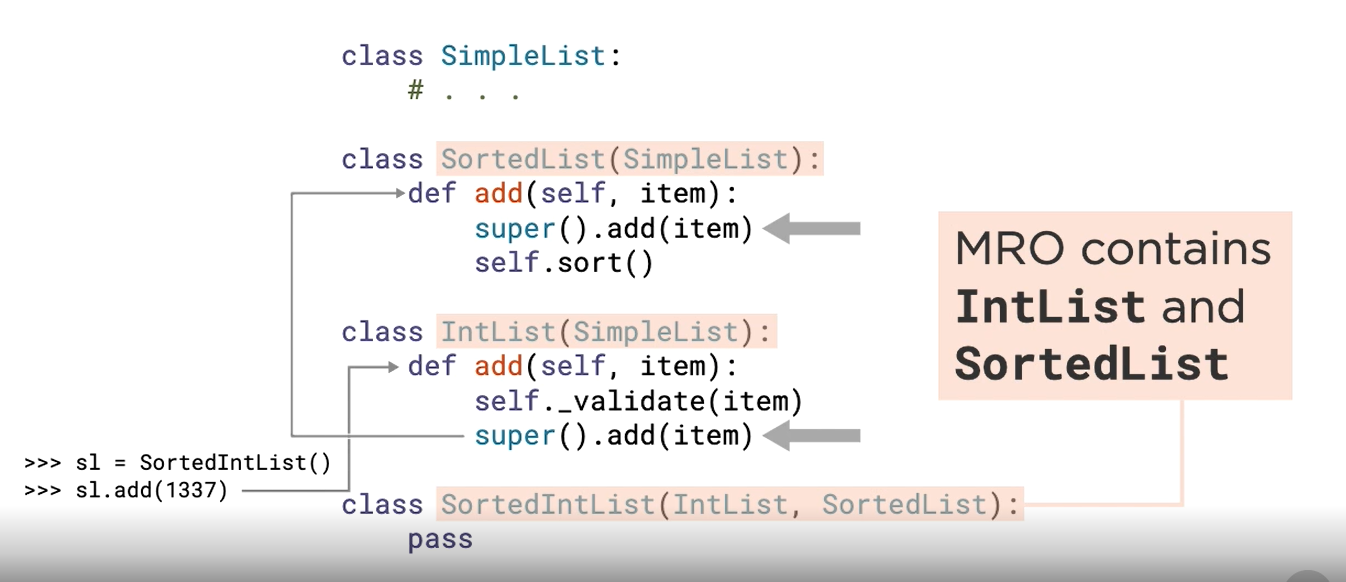

In [53]:
from IPython.display import Image
Image(filename='Super_mistery.png') 

The combined subclass works this way because Super() uses the MRO of SortedIntList, which has IntList and SortedList, so the 'first' add looks at IntList(because of order), and the super in IntList looks at the classes after IntList, which is SortedList  
Super() does not simple access the base class, it accesses the full MRO that contains the class where it is called

This property combines both validations without automatically, whithout need for further changes

### Class Decorators
Work the same way as function decorators, but the argument is conventionally, `cls`
Class decorators factories is the best way to parameterize decorators
Many interest class decorators are already built in, like `property, staticmethod, classmethod` and others, similalr to how it is with function decorators 

### Data Classes
The dataclass decorator is a way include metadata of a class, and then sintethize __repr__ and __str__ methods  
The best way to use Data classes is to use only for immutable attributes and to be declared frozen  
This solves many problems with hashability
To enforce invariants use `__post_init__` inside the class

It's best to keep data classes very simple, avoid inheritance, and keep immutability  

In [55]:
@dataclass(eq=True, frozen=True)
class DataClass:
    arg1 = str
    arg2 = SomeOtherClass

    def __post_init__(self):
        if self.arg1 == None:
            raise ValueError('Does not accept empty argument')

NameError: name 'dataclass' is not defined

## Encapsulation
## Abstraction
## Inheritance
## Polymorphism